## Data Processing

In [ ]:
# Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
!pip install geopandas
import geopandas as gpd
!pip install geopandas matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 931kB 2.6MB/s 
     |████████████████████████████████| 14.7MB 302kB/s 
     |████████████████████████████████| 10.4MB 43.2MB/s 


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#read in the data 
#Load Data and encode to latin
accident = pd.read_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Accident_Information .csv', encoding = 'latin')
vehicle = pd.read_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Vehicle_Information.csv', encoding = 'latin')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Recode for certain columns to show the codes of their description

# Read in the entire Data Guide excel file
guide = pd.ExcelFile('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Data Guide.xlsx')


# Read in the Accident Severity, Light Conditions, Weather, Day of Week, Local Authority(District), 
# Local Authority (Highway), Road Type, Road Surface, and Vehicle Type worksheets of the Data Guide
acc_sev = pd.read_excel(guide, 'Accident Severity')
acc_sev.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Accident Severity.csv')

lig_con = pd.read_excel(guide, 'Light Conditions')
lig_con.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Light Conditions.csv')
wea_con = pd.read_excel(guide, 'Weather')
wea_con.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Weather.csv')
dayofweek = pd.read_excel(guide, 'Day of Week')
dayofweek.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Day of Week.csv')
locau_dis = pd.read_excel(guide, 'Local Authority (District)')
locau_dis.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Local Authority (District).csv')
locau_hig = pd.read_excel(guide, 'Local Authority (Highway)')
locau_hig.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Local Authority (Highway).csv')
road_type = pd.read_excel(guide, 'Road Type')
road_type.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Road Type.csv')
road_sur = pd.read_excel(guide, 'Road Surface')
road_sur.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Road Surface.csv')
veh_type = pd.read_excel(guide, 'Vehicle Type')
veh_type.to_csv('/content/drive/Shared drives/Python project/Road_Accidents_Incidence/Vehicle Type.csv')

# Merge our dataset with the description files
accident = pd.merge(acc_sev, accident, left_on='label', right_on='Accident_Severity')
accident = accident.drop(columns='label')
accident = accident.rename(columns={'label':'Accident_Severity',
                        'code':'Accident_Sev_code'})

accident = pd.merge(lig_con, accident, left_on='label', right_on='Light_Conditions')
accident = accident.drop(columns='label')
accident = accident.rename(columns={'label':'Light_Conditions',
                        'code':'lig_con_code'})

accident = pd.merge(wea_con, accident, left_on='label', right_on='Weather_Conditions')
accident = accident.drop(columns='label')
accident = accident.rename(columns={'code':'weather_con_code',
                        'label':'Weather_Conditions'})

accident = pd.merge(dayofweek, accident, left_on='label', right_on='Day_of_Week')
accident = accident.drop(columns='label')
accident = accident.rename(columns={'code':'day_of_week_code',
                        'label':'Day_of_Week'})

accident = pd.merge(road_type, accident, left_on='label', right_on='Road_Type')
accident = accident.drop(columns='label')
accident = accident.rename(columns={'code':'road_type_code',
                        'label':'Road_Type'})

accident = pd.merge(road_sur, accident, left_on='label', right_on='Road_Surface_Conditions')
accident = accident.drop(columns='label')
accident = accident.rename(columns={'code':'road_surface_conditions_code',
                        'label':'Road_Surface_Conditions'})

accident.head()


,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Accident_Sev_code,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,1,1,1,1,1,1,2005130278105,Motorway,62.0,A,1.0,Fatal,None,2005-04-03,Sunday,1.0,Give way or uncontrolled,Roundabout,53.696614,Daylight,Wakefield,Wakefield,448350.0,422490.0,-1.269186,E01011803,1,3,0.0,0.0,West Yorkshire,Dry,Roundabout,None,70.0,15:25,Rural,Fine no high winds,2005,No
1,1,1,1,1,1,1,2005160D03020,A,63.0,Unclassified,0.0,Fatal,None,2005-06-19,Sunday,1.0,Give way or uncontrolled,Roundabout,53.728090,Daylight,"Kingston upon Hull, City of","Kingston upon Hull, City of",507320.0,426970.0,-0.374778,E01012889,2,2,0.0,0.0,Humberside,Dry,Roundabout,None,30.0,14:00,Urban,Fine no high winds,2005,No
2,1,1,1,1,1,1,200520E091602,Unclassified,0.0,Unclassified,0.0,Fatal,None,2005-06-05,Sunday,1.0,Give way or uncontrolled,Mini-roundabout,52.405691,Daylight,Birmingham,Birmingham,407110.0,278640.0,-1.896923,E01008980,1,1,0.0,0.0,West Midlands,Dry,Roundabout,None,30.0,20:25,Urban,Fine no high winds,2005,No
3,1,1,1,1,1,1,2005215319572,A,460.0,Unclassified,116.0,Fatal,None,2005-06-12,Sunday,1.0,Give way or uncontrolled,Roundabout,52.690270,Daylight,Cannock Chase,Staffordshire,399260.0,310290.0,-2.012395,E01029353,1,2,0.0,0.0,Staffordshire,Dry,Roundabout,None,50.0,07:10,Rural,Fine no high winds,2005,No
4,1,1,1,1,1,1,20054100B0717,B,6426.0,B,6426.0,Fatal,None,2005-09-25,Sunday,1.0,Give way or uncontrolled,Roundabout,51.761536,Daylight,Welwyn Hatfield,Hertfordshire,522220.0,208470.0,-0.230440,E01023922,1,1,0.0,0.0,Hertfordshire,Dry,Roundabout,None,30.0,14:45,Urban,Fine no high winds,2005,No


In [ ]:
# Merging two data sets into one with inner join by index
df0 = pd.merge(vehicle, accident, how = 'inner', on = 'Accident_Index')
df0.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_x,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Accident_Sev_code,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005,1,3,4,1,4,3,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005,1,6,5,1,4,3,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005,1,6,6,1,1,3,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005,2,6,2,1,7,3,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005,2,6,3,2,1,3,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,D

## 1. Data EDA and Visualization 

### Data EDA

In [ ]:
# shape
df0.shape

(2058408, 63)

In [ ]:
# data type
df0.dtypes

Accident_Index            object
Age_Band_of_Driver        object
Age_of_Vehicle           float64
Driver_Home_Area_Type     object
Driver_IMD_Decile        float64
                          ...   
Time                      object
Urban_or_Rural_Area       object
Weather_Conditions        object
Year_y                     int64
InScotland                object
Length: 63, dtype: object

In [ ]:
# calculate the number of categorical and the number of numerical
categorical = [var for var in df0.columns if df0[var].dtypes == 'object']
print(len(categorical))

numerical = [var for var in df0.columns if df0[var].dtypes != 'object']
print(len(numerical))

38
25


In [ ]:
# we need to replace -1 with NA's since they are the missing values 
df0.replace(-1, np.nan, inplace=True)

In [ ]:
# check the missing values
df0.isnull().sum()

Accident_Index                0
Age_Band_of_Driver            0
Age_of_Vehicle           337962
Driver_Home_Area_Type         0
Driver_IMD_Decile        689290
                          ...  
Time                        146
Urban_or_Rural_Area           0
Weather_Conditions            0
Year_y                        0
InScotland                   44
Length: 63, dtype: int64

In [ ]:
# dropping the irrelavant columns 
drop_cols = ['Driver_IMD_Decile','2nd_Road_Class']
df0 = df0.drop(drop_cols, axis=1)
print(df0.shape)
df0.head()

(2058408, 61)


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_x,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Accident_Sev_code,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005,1.0,3.0,4,1.0,4.0,3,B,450.0,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005,1.0,6.0,5,1.0,4.0,3,C,0.0,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005,1.0,6.0,6,1.0,1.0,3,A,3220.0,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005,2.0,6.0,2,1.0,7.0,3,Unclassified,0.0,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005,2.0,6.0,3,2.0,1.0,3,Unclassified,0.0,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not

In [ ]:
# dropping the nas, since our dataset is huge we can drop nas
df0 = df0.dropna()
df0.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_x,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Accident_Sev_code,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
2,200501BS00004,46 - 55,4.0,Urban area,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005,1.0,6.0,6,1.0,1.0,3,A,3220.0,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005,2.0,6.0,3,2.0,1.0,3,Unclassified,0.0,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
5,200501BS00006,26 - 35,2.0,Urban area,124.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,PIAGGIO,VESPA ET4,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 125cc and under,No,Did not impact,2005,2.0,6.0,3,2.0,1.0,3,Unclassified,0.0,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
7,200501BS00007,36 - 45,4.0,Urban area,4266.0,None,None,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,MERCEDES,ML 430 AUTO,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Parked,2,Car,No,Back,2005,1.0,6.0,5,1.0,4.0,3,C,0.0,0.0,Slight,None,2005-01-13,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524220.0,180830.0,-0.211277,E01002875,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
8,200501BS00009,66 - 75,16.0,Urban area,5343.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,JAGUAR,XJ-S CONVERTIBLE AUTO,Petrol,Male,None,No tow/articulation,Nearside,0.0,Going ahead other,1,Car,No,Front,2005,1.0,3.0,6,1.0,1.0,3,A,315.0,0.0,Slight,None,2005-01-14,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.502260,Daylight,Kensington and 

In [ ]:
# check the missing values
df0.isnull().sum()

Accident_Index           0
Age_Band_of_Driver       0
Age_of_Vehicle           0
Driver_Home_Area_Type    0
Engine_Capacity_.CC.     0
                        ..
Time                     0
Urban_or_Rural_Area      0
Weather_Conditions       0
Year_y                   0
InScotland               0
Length: 61, dtype: int64

In [ ]:
# converting the date column and the time column 
df0['DateTime'] = df0['Date'] + ' ' + df0['Time']
df0['DateTime'] = pd.to_datetime(df0['DateTime'])
df0['Date'] = pd.to_datetime(df0['Date'])

### Visualisation 

In [ ]:
# slice first and second string from time column
# for this plot we will use accident dataset
accident['Date']= pd.to_datetime(accident['Date'], format="%Y-%m-%d")
 
plot_1 = accident
plot_1['Hour'] = accident['Time'].str[0:2] # getting the hour 

# convert new column to numeric datetype
plot_1['Hour'] = pd.to_numeric(plot_1['Hour'])

# drop null values in our new column
plot_1 = plot_1.dropna(subset=['Hour'])

# cast to integer values
plot_1['Hour'] = plot_1['Hour'].astype('int')
plot_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Accident_Sev_code,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour
0,1,1,1,1,1,1,2005130278105,Motorway,62.0,A,1.0,Fatal,None,2005-04-03,Sunday,1.0,Give way or uncontrolled,Roundabout,53.696614,Daylight,Wakefield,Wakefield,448350.0,422490.0,-1.269186,E01011803,1,3,0.0,0.0,West Yorkshire,Dry,Roundabout,None,70.0,15:25,Rural,Fine no high winds,2005,No,15
1,1,1,1,1,1,1,2005160D03020,A,63.0,Unclassified,0.0,Fatal,None,2005-06-19,Sunday,1.0,Give way or uncontrolled,Roundabout,53.728090,Daylight,"Kingston upon Hull, City of","Kingston upon Hull, City of",507320.0,426970.0,-0.374778,E01012889,2,2,0.0,0.0,Humberside,Dry,Roundabout,None,30.0,14:00,Urban,Fine no high winds,2005,No,14
2,1,1,1,1,1,1,200520E091602,Unclassified,0.0,Unclassified,0.0,Fatal,None,2005-06-05,Sunday,1.0,Give way or uncontrolled,Mini-roundabout,52.405691,Daylight,Birmingham,Birmingham,407110.0,278640.0,-1.896923,E01008980,1,1,0.0,0.0,West Midlands,Dry,Roundabout,None,30.0,20:25,Urban,Fine no high winds,2005,No,20
3,1,1,1,1,1,1,2005215319572,A,460.0,Unclassified,116.0,Fatal,None,2005-06-12,Sunday,1.0,Give way or uncontrolled,Roundabout,52.690270,Daylight,Cannock Chase,Staffordshire,399260.0,310290.0,-2.012395,E01029353,1,2,0.0,0.0,Staffordshire,Dry,Roundabout,None,50.0,07:10,Rural,Fine no high winds,2005,No,7
4,1,1,1,1,1,1,20054100B0717,B,6426.0,B,6426.0,Fatal,None,2005-09-25,Sunday,1.0,Give way or uncontrolled,Roundabout,51.761536,Daylight,Welwyn Hatfield,Hertfordshire,522220.0,208470.0,-0.230440,E01023922,1,1,0.0,0.0,Hertfordshire,Dry,Roundabout,None,30.0,14:45,Urban,Fine no high winds,2005,No,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,-1,9,7,9,7,3,2017010060798,A,1209.0,Unclassified,0.0,Slight,Data missing or out of range,2017-09-02,Saturday,2.0,Data missing or out of range,Data missing or out of range,51.523889,Darkness - lighting unknown,Tower Hamlets,Tower Hamlets,533700.0,182310.0,-0.074174,E01004317,1,1,NaN,NaN,Metropolitan Police,Data missing or out of range,Unknown,Data missing or out of range,20.0,03:40,Urban,Unknown,2017,No,3
2047252,-1,9,7,9,7,3,2017010062452,Unclassified,0.0,Unclassified,0.0,Slight,Data missing or out of range,2017-09-23,Saturday,2.0,Data missing or out of range,Data missing or out of range,51.618398,Darkness - lighting unknown,Enfield,Enfield,531140.0,192760.0,-0.107158,E01001498,1,1,NaN,NaN,Metropolitan Police,Data missing or out of range,Unknown,Data missing or out of range,30.0,12:35,Urban,Unknown,2017,No,12
2047253,-1,9,7,9,7,3,2017010067946,A,301.0,Unclassified,0.0,Slight,Data missing or out of range,2017-10-28,Saturday,2.0,Data missing or out of range,Data missing or out of range,51.503727,Darkness - lighting unknown,Lambeth,Lambeth,531150.0,180000.0,-0.111769,E01032582,1,1,NaN,NaN,Metropolitan Police,Data missing or out of range,Unknown,Data missing or out of range,30.0,23:50,Urban,Unknown,2017,No,23
2047254,-1,9,7,9,7,3,2017010100211,C,0.0,A,5.0,Slight,Data missing or out of range,2017-12-30,Saturday,2.0,Data missing or out of range,T or staggered junction,51.524634,Darkness - lighting unknown,Westminster,Westminster,526560.0,182210.0,-0.177072,E01004703,1,2,NaN,NaN,Metropolitan Police,Data missing or out of range,Unknown,Data m

In [ ]:
# lets define a function to group the hour into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [ ]:
# apply thus function to our temporary hour column
plot_1['Daytime'] = plot_1['Hour'].apply(when_was_it)
plot_1[['Time', 'Hour', 'Daytime']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Time,Hour,Daytime
0,15:25,15,afternoon rush (15-19)
1,14:00,14,office hours (10-15)
2,20:25,20,evening (19-23)
3,07:10,7,morning rush (5-10)
4,14:45,14,office hours (10-15)


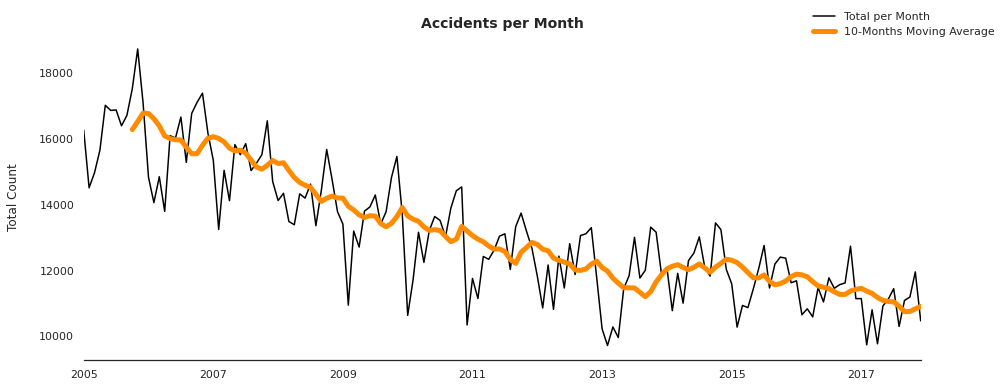

In [ ]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
plot_1.set_index('Date').resample('M').size().plot(label='Total per Month', color='black', ax=ax)
plot_1.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

In [ ]:
# count the accidents per day and by weather
plot1 = plot_1.groupby(['Accident_Severity', 'Date']).size()
plot1 = pd.DataFrame(plot1)

# rename columns
plot1.columns = [*plot1.columns[:-1], 'CountAccidents']
plot1.head(45)

TotalCases=plot1.max(level=0)['CountAccidents'].reset_index().set_index('Accident_Severity')
TotalCases

# making each severity case
FatalFirstCase=plot1.loc['Fatal']['CountAccidents'].reset_index().set_index('Date')
Seriousfirstcase = plot1.loc['Serious']['CountAccidents'].reset_index().set_index('Date')
Slightfirstcase = plot1.loc['Slight']['CountAccidents'].reset_index().set_index('Date')

# making each countrywise case
FatalGrowth=FatalFirstCase[FatalFirstCase.ne(0)].dropna().reset_index()
SeriousGrowth=Seriousfirstcase[Seriousfirstcase.ne(0)].dropna().reset_index()
SlightGrowth=Slightfirstcase[Slightfirstcase.ne(0)].dropna().reset_index()

In [ ]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

In [ ]:
fig1 = make_subplots(rows=1, cols=1,shared_xaxes=True,
                   subplot_titles=('Accident Severity','ignore'))
fig1.add_trace(go.Scatter(x=FatalGrowth.index,y=FatalGrowth['CountAccidents'],
                         mode='lines+markers',
                         name='Fatal',
                         text=['Text I'],
                         line=dict(width=2)), 
                          row=1,col=1)

fig1.add_trace(go.Scatter(x=SeriousGrowth.index,y=SeriousGrowth['CountAccidents'],
                         mode='lines+markers',
                         name='Serious',
                         line=dict(width=2)),
                          row=1,col=1)


fig1.add_trace(go.Scatter(x=SlightGrowth.index,y=SlightGrowth['CountAccidents'],
                         mode='lines+markers',
                         name='Slight',
                         line=dict(width=2)),
                          row=1,col=1)

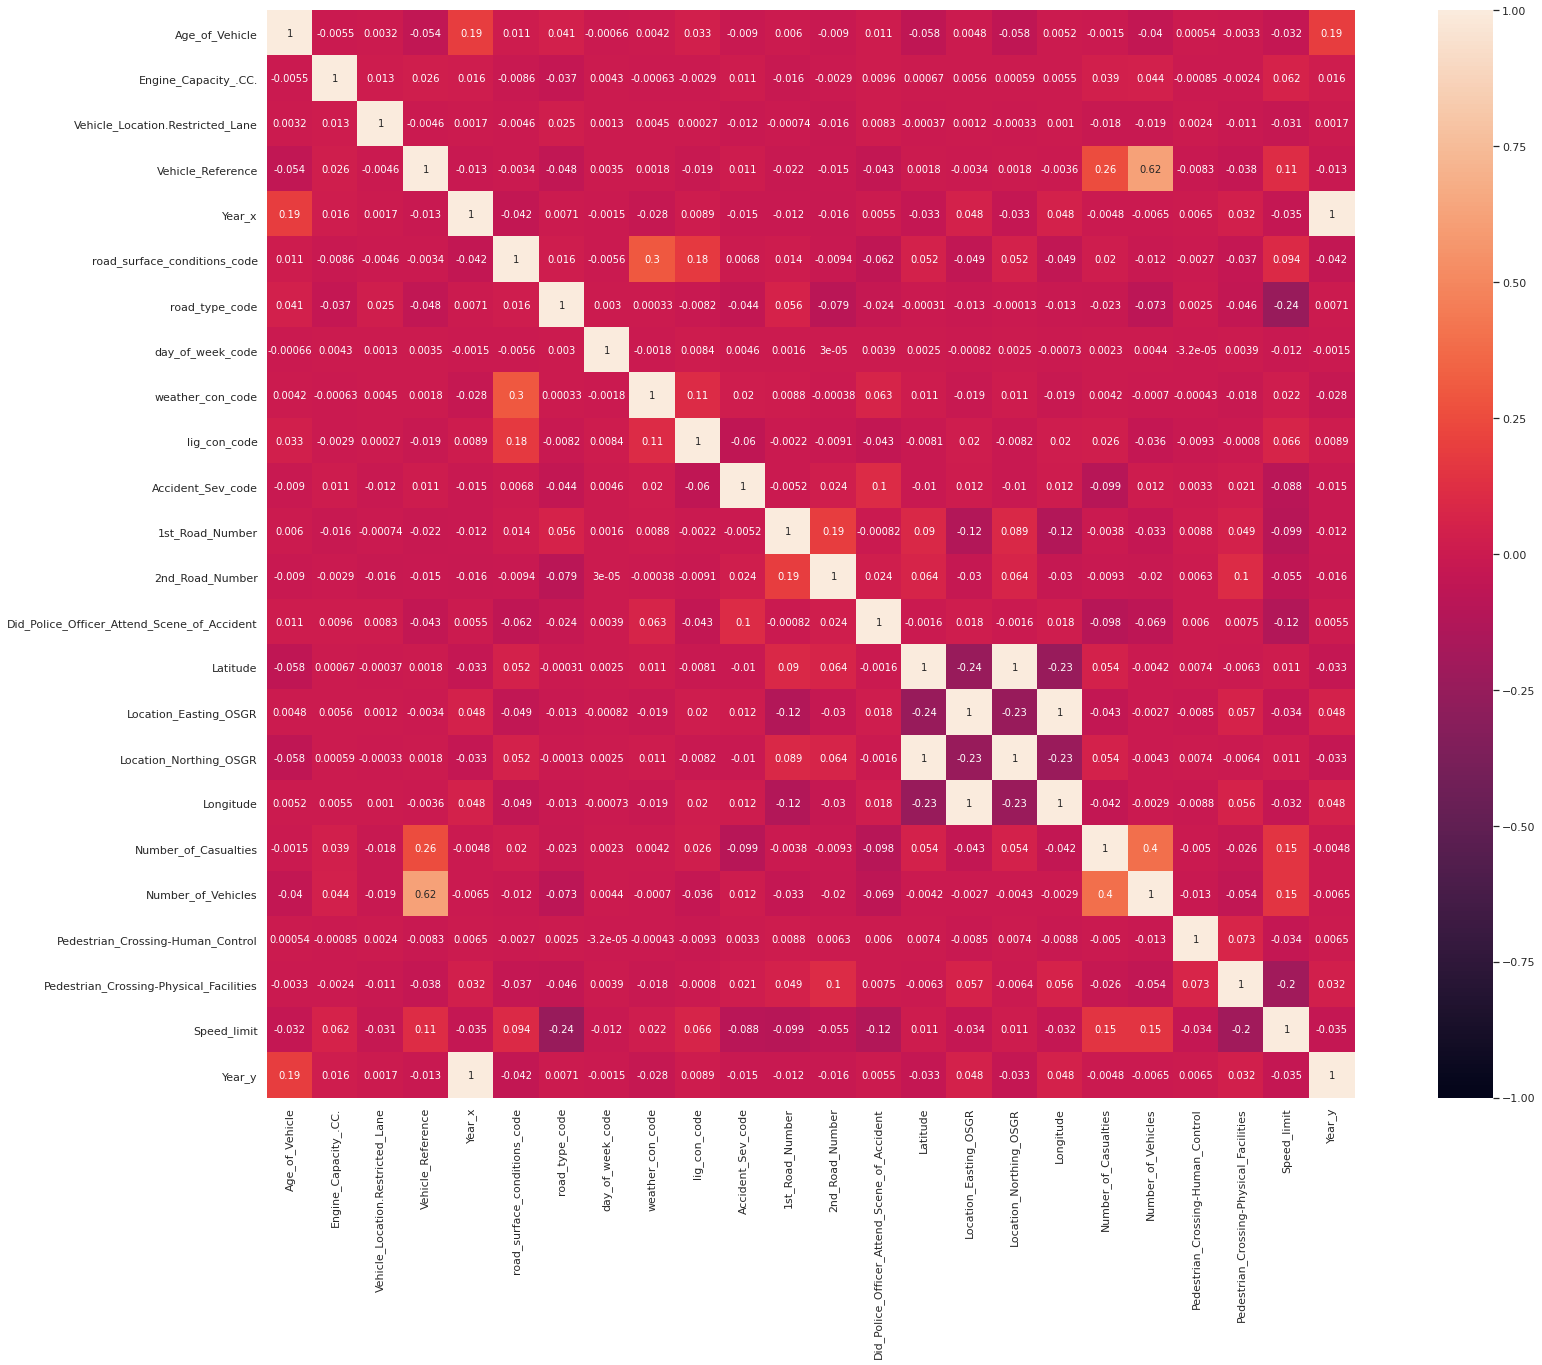

In [ ]:
# Heat map
import seaborn as sns
tmp_data = df0.set_index('Accident_Index')
#tmp_data = main_df.drop(columns={'driver_imd_decile','vehicle_imd_decile'})
corrmat = tmp_data.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, 
            vmin=-1,
            vmax=1, 
            square=True,
            annot=True)

#ax = sns.pairplot(df, size)
plt.show()

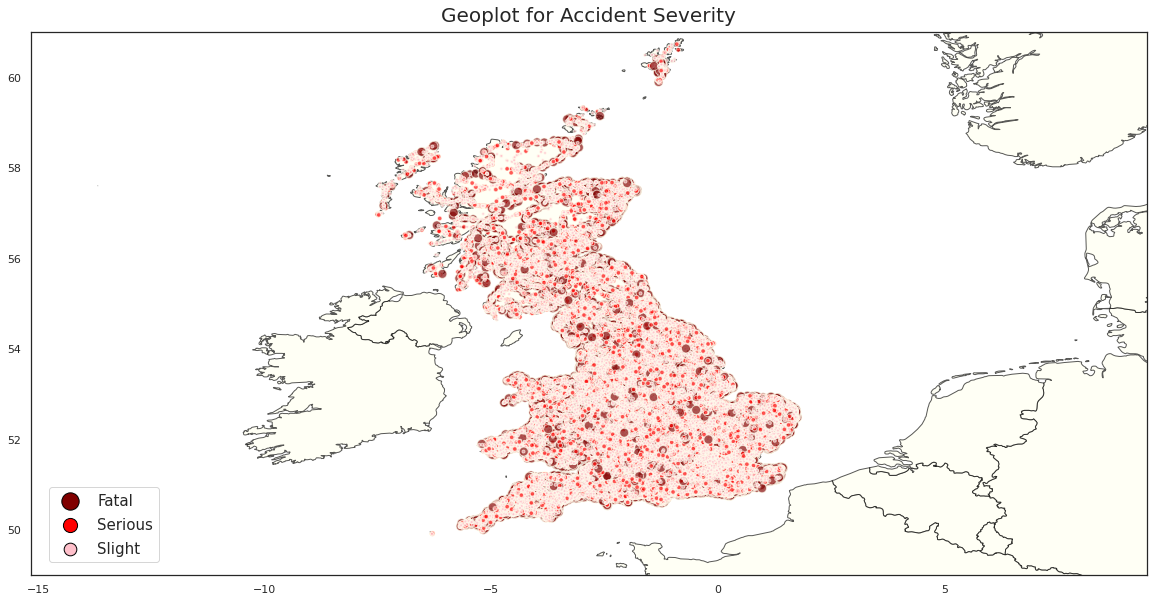

In [ ]:
# Geoplot
plt.rcParams['figure.figsize'] = (20, 10)
world = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')

# Subset the data
geo_data = accident[['Accident_Sev_code','Longitude','Latitude']]
# Drop N/A
geo_data = geo_data.dropna()
# Create the geometry column for the coordinate of each state
geo_data = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Longitude, geo_data.Latitude))
# Drop the original latitude and longitude columns
geo_data = geo_data.iloc[:, [0,-1]]
# Create a column for a sequence of colors
colors = []

for i in geo_data['Accident_Sev_code']:
  if i==1:
    colors.append('maroon')
  elif i==2:
    colors.append('red')
  else:
    colors.append('pink')

geo_data['colors_as'] = colors

# Plot the bubble plot
fig, ax = plt.subplots(1, figsize=(20,10))

base = world.plot(ax=ax, 
                color='ivory', 
                edgecolor='black', 
                linewidth=1,
                alpha=0.65)

geo = geo_data.plot(ax=base,
                    marker='o',
                    c=geo_data['colors_as'],
                    markersize = 80/(geo_data.iloc[:, 0]**2),
                    edgecolor='ivory',
                    alpha=0.65)

ax.set_title('Geoplot for Accident Severity', fontsize=20, pad=10)
plt.axis('equal')

ax.set_xlim(-7.5, 1.8) # Set a limit for the min and max longitudes
ax.set_ylim(49, 61) # Set a limit for the min and max latitudes

ax.scatter([0], [0], c='maroon', alpha=1, s=15/10*200,
            label='Fatal', edgecolor='black')
ax.scatter([0], [0], c='red', alpha=1, s=10/10*200,
            label='Serious', edgecolor='black')
ax.scatter([0], [0], c='pink', alpha=1, s=8/10*200,
            label='Slight', edgecolor='black')

ax.legend(scatterpoints=1, frameon=True,
          labelspacing=0.6, loc='lower left', fontsize=15,
          bbox_to_anchor=(0.01,0.01), title_fontsize=15)

plt.show()

In [ ]:
# age and gender of the drivers
drivers = df0.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == 'Data missing or out of range') | \
                     (drivers['Age_Band_of_Driver'] == '0 - 5') | \
                     (drivers['Age_Band_of_Driver'] == '6 - 10') | \
                     (drivers['Age_Band_of_Driver'] == '11 - 15') |
                     (drivers['Sex_of_Driver'] == 'Not known') | \
                     (drivers['Sex_of_Driver'] == 'Data missing or out of range')]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']
drivers

,Age_Band_of_Driver,Sex_of_Driver,Count
4,16 - 20,Female,41378
5,16 - 20,Male,81636
8,21 - 25,Female,62169
9,21 - 25,Male,106369
12,26 - 35,Female,107828
13,26 - 35,Male,192923
15,36 - 45,Female,101559
16,36 - 45,Male,175770
19,46 - 55,Female,77197
20,46 - 55,Male,141078


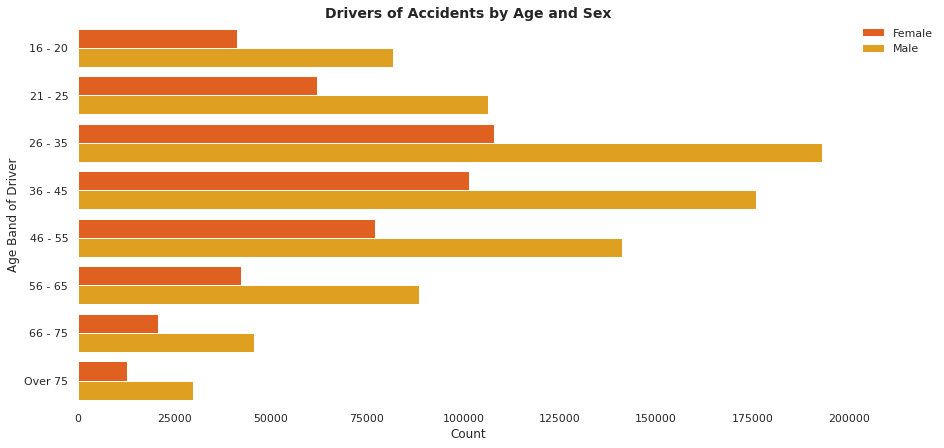

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='autumn')
ax.set_title('Drivers of Accidents by Age and Sex', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

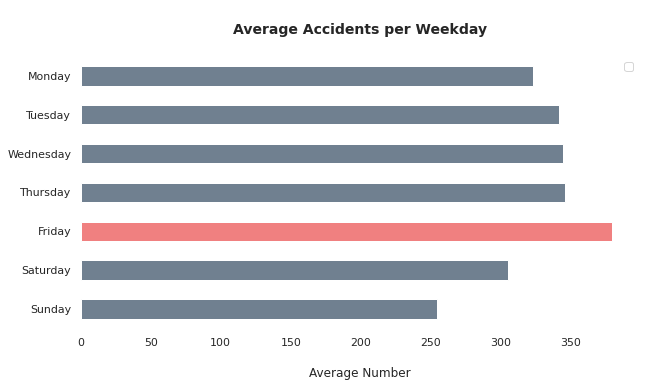

In [ ]:
weekday_counts = pd.DataFrame(df0.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']

weekday = weekday_counts['Date'].dt.day_name()

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)

days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['slategrey', 'slategrey', 'lightcoral', 'slategrey', 
        'slategrey', 'slategrey', 'slategrey']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [ ]:
weekday = df0['Date'].dt.day_name()
year= df0['Date'].dt.year
accident_table = df0.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2005,7898,9479,11614,10596,10599,10285,9785
2006,8182,9792,12594,10700,11137,10702,9911
2007,9071,10466,12808,11658,11697,11569,11225
2008,8982,10668,13020,11713,12294,12360,11328
2009,15033,18533,22347,19987,20480,20504,18633
2010,14751,18445,22546,19976,19872,20112,19386
2011,14954,18134,22754,21152,20582,19676,19038
2012,14535,17342,21539,20155,20031,19492,18813
2013,14234,17224,21877,19962,19150,19727,18349


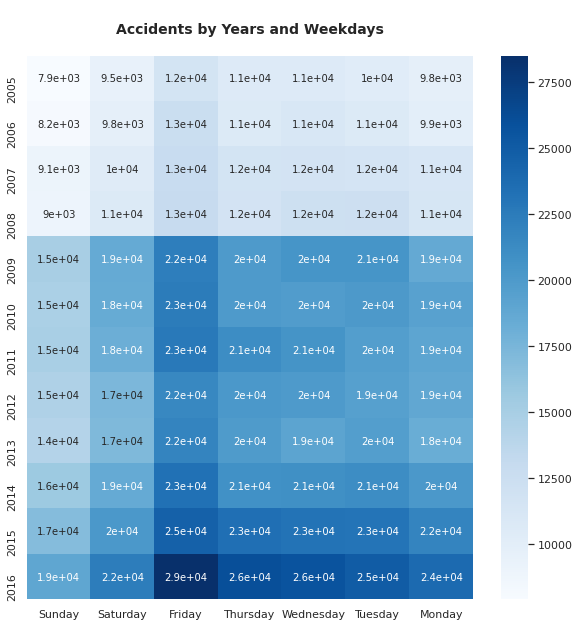

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(accident_table, cmap='Blues',annot=True)
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

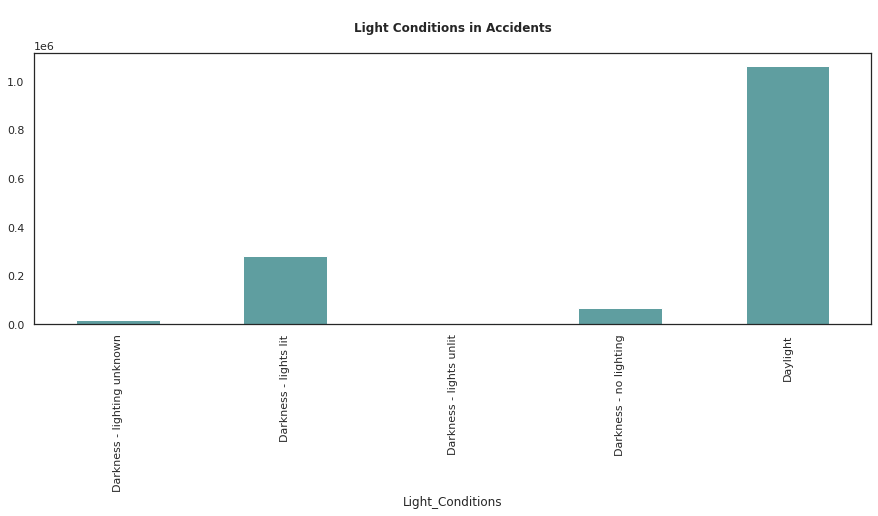

In [ ]:
# It's so cool, the most accidents happened in the Daylight! I thought it might be at night.
df0.groupby(['Light_Conditions']).size().plot.bar(figsize=(15,5), color='cadetblue')
plt.title('\nLight Conditions in Accidents\n', fontweight='bold')
plt.show()

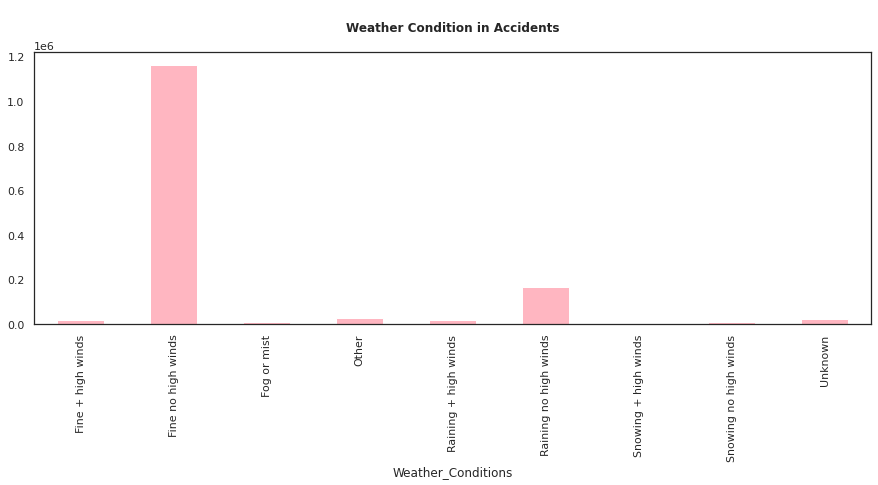

In [ ]:
# weather condition in accidents
df0.groupby(['Weather_Conditions']).size().plot.bar(figsize=(15,5), color='lightpink')
plt.title('\nWeather Condition in Accidents\n', fontweight='bold')
plt.show()

### Contingency Table 

In [ ]:
# create a little dictionary to later look up the groups I will create
daytime_groups = {1: 'Morning (5-10)', 
                  2: 'Office Hours (10-15)', 
                  3: 'Afternoon Rush (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

In [ ]:
# slice first and second string from time column
df0['Hour'] = df0['Time'].str[0:2]

# convert new column to numeric datetype
df0['Hour'] = pd.to_numeric(df0['Hour'])

# drop null values in our new column
df0 = df0.dropna(subset=['Hour'])

# cast to integer values
df0['Hour'] = df0['Hour'].astype('int')

# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"
    
# apply this function to our temporary hour column
df0['Daytime'] = df0['Hour'].apply(when_was_it)

# drop old time column and temporary hour column
df0 = df0.drop(columns=['Time', 'Hour'])

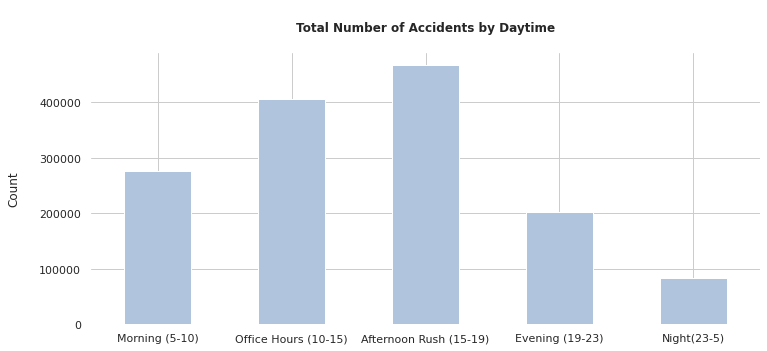

In [ ]:
# define labels by accessing look up dictionary above
labels = tuple(daytime_groups.values())

# plot total no. of accidents by daytime
df0.groupby('Daytime').size().plot(kind='bar', color='lightsteelblue', figsize=(12,5), grid=True)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.xlabel(''), plt.ylabel('Count\n')
plt.title('\nTotal Number of Accidents by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

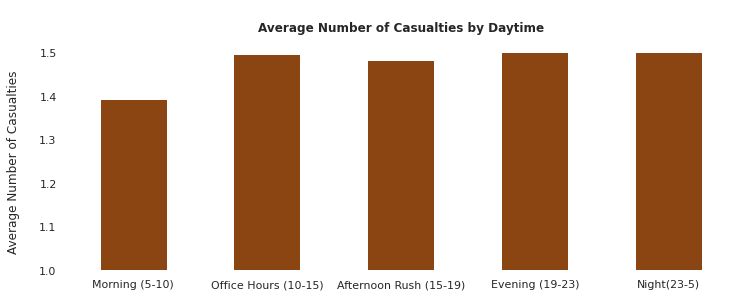

In [ ]:
# plot average no. of casualties by daytime
df0.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind='bar', color='saddlebrown', 
                                                                 figsize=(12,4), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

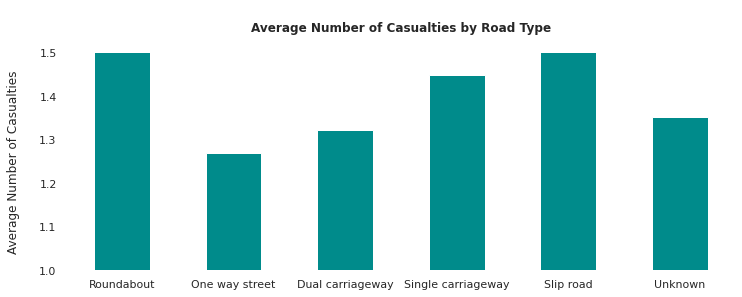

In [ ]:
# check road type
df0.groupby('Road_Type')['Number_of_Casualties'].mean().plot(kind='bar', color='darkcyan', 
                                                            figsize=(12,4), grid=False)
plt.xticks(np.arange(6), 
           ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 'Slip road', 'Unknown'], 
           rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Road Type\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

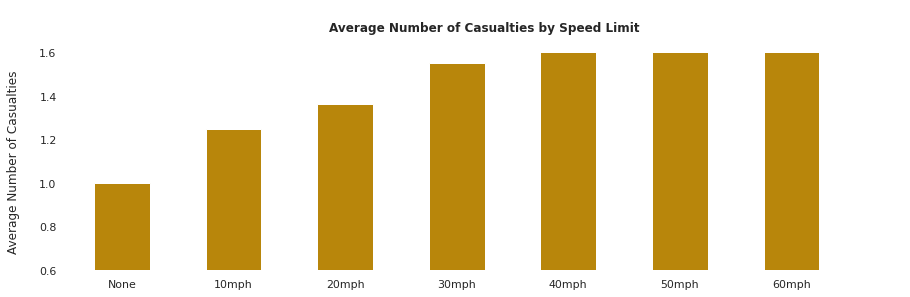

In [ ]:
# check speed limit
df0.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='darkgoldenrod', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(8), 
           ['None', '10mph', '20mph', '30mph', '40mph', '50mph', '60mph'], 
           rotation='horizontal')
plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

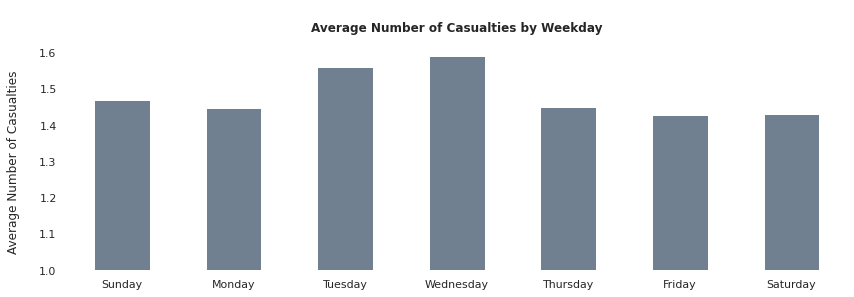

In [ ]:
# check daytime
df0.groupby('Day_of_Week')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(14,4), grid=False)
plt.xticks(np.arange(7), 
           ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
           rotation='horizontal')
plt.ylim((1.0,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Weekday\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

In [ ]:
# count the accidents per day and by district
Count1 = df0.groupby(['Day_of_Week', 'Local_Authority_(District)','Accident_Severity']).size()
Count1 = pd.DataFrame(Count1)
Count1.head()
# rename columns
Count1.columns = [*Count1.columns[:-1], 'CountAccidents']
Count1.head(20)

CountAccidents
Day_of_Week Local_Authority_(District) Accident_Severity                
Friday      Adur                       Fatal                           3
                                       Serious                        27
                                       Slight                        224
            Allerdale                  Fatal                           6
                                       Serious                        63
                                       Slight                        406
            Alnwick                    Slight                         44
            Amber Valley               Fatal                           1
                                       Serious                        63
                                       Slight                        426
            Arun                       Fatal                           4
                                       Serious                        90
                                       Slight                        444
            Ashfield                   Fatal                           2
                                       Serious                        86
                                       Slight                        524
            Ashford                    Fatal                          10
                                       Serious                        50
                                       Slight                        508
            Aylesbury Vale             Fatal                          15

In [ ]:
# count the accidents per day and by weather and road surf condition
Count2 = df0.groupby(['Date', 'Weather_Conditions', 'Road_Surface_Conditions','Accident_Severity']).size()
Count2 = pd.DataFrame(Count2)
Count2.head()
# rename columns
Count2.columns = [*Count2.columns[:-1], 'CountAccidents']
Count2.head(20)

CountAccidents
Date       Weather_Conditions    Road_Surface_Conditions Accident_Severity                
2005-01-01 Fine + high winds     Dry                     Serious                         1
                                 Frost or ice            Slight                          1
                                 Wet or damp             Slight                          3
           Fine no high winds    Dry                     Fatal                           2
                                                         Serious                         2
                                                         Slight                         23
                                 Wet or damp             Fatal                           2
                                                         Serious                         6
                                                         Slight                         22
           Other                 Dry                     Slight                          1
                                 Wet or damp             Fatal                           1
                                                         Slight                          2
           Raining + high winds  Wet or damp             Slight                         12
           Raining no high winds Wet or damp             Serious                         2
                                                         Slight                         14
           Unknown               Dry                     Slight                          2
2005-01-02 Fine + high winds     Dry                     Slight                          1
                                 Wet or damp             Slight                          2
           Fine no high winds    Dry                     Serious                        10
                                                         Slight                         59

In [ ]:
# count the accidents per day and by age of drive, light conditions and road type 
Count3 = df0.groupby(['Date', 'Age_Band_of_Driver', 'Sex_of_Driver','Light_Conditions','Road_Type','Vehicle_Type','Accident_Severity']).size()
Count3 = pd.DataFrame(Count3)
Count3.head()
# rename columns
Count3.columns = [*Count3.columns[:-1], 'CountAccidents']
Count3.head(25)

CountAccidents
Date       Age_Band_of_Driver Sex_of_Driver Light_Conditions        Road_Type          Vehicle_Type                        Accident_Severity                
2005-01-01 16 - 20            Female        Darkness - lights lit   Single carriageway Car                                 Slight                          2
                              Male          Darkness - lights lit   Single carriageway Car                                 Slight                          1
                                            Darkness - no lighting  Single carriageway Car                                 Fatal                           1
                                                                                                                           Slight                          3
                                            Daylight                Single carriageway Car                                 Serious                         1
                                                                                                                           Slight                          3
           21 - 25            Female        Darkness - lights lit   Single carriageway Car                                 Slight                          1
                                            Daylight                Dual carriageway   Car                                 Slight                          1
                              Male          Darkness - lights lit   Single carriageway Car                                 Slight                          5
                                            Darkness - lights unlit Single carriageway Car                                 Slight                          1
                                            Darkness - no lighting  Single carriageway Van / Goods 3.5 tonnes mgw or under Serious                         1
                                            Daylight                Single carriageway Car                                 Slight                          2
           26 - 35            Female        Darkness - lights lit   Single carriageway Car                                 Slight                          2
                                            Daylight                Dual carriageway   Car                                 Slight                          1
                                                                    Single carriageway Car                                 Slight                          3
                              Male          Darkness - lights lit   Dual carriageway   Car                                 Slight                          2
                                                                    Roundabout         Car                                 Slight                          1
                                                                    Single carriageway Car                                 Fatal                           1
                                                                                                                           Slight                          5
                                                                                       Motorcycle 125cc and under          Slight                          1
                                                                                       Van / Goods 3.5 tonnes mgw or under Slight                          1
                                            Darkness - no lighting  Dual carriageway   Car                                 Serious                         1
                                                                                                                           Slight                          1
                                                                    Single carriageway Car                                 Serious                         1
                                                            

## 2. Modeling
### a. Should include spot checking, then hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

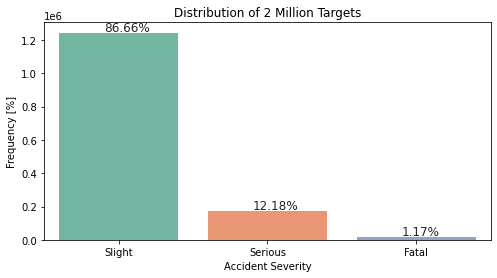

In [ ]:
# sample the data, we found the target variable is imbalanced, so we decided to reduce rows with slight accident severity 

ax = sns.countplot(x = df0.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df0.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 2 Million Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [ ]:
# To find out how many observations for Serious and Fatal
sub_data1 = df0[(df0['Accident_Severity'] == 'Serious') | (df0['Accident_Severity'] == 'Fatal')]
sub_data1.shape

(191554, 62)

In [ ]:
# Since the sum of Serious and Fatal is 191554 rows, we sampled the Slight data to match the number
sub_data2 = df0[df0['Accident_Severity'] == 'Slight']
sub_data2 = sub_data2.sample(n = 191554)
sub_data2.shape

(191554, 62)

In [ ]:
# Merge data for modeling
frames = [sub_data1, sub_data2]
Model_df = pd.concat(frames)
print(Model_df.shape)
Model_df.head()

(383108, 62)


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_x,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Accident_Sev_code,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,DateTime
18,200501BS00022,26 - 35,1.0,Urban area,1997.0,None,None,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,HONDA,ACCORD VTEC SPORT,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005,1.0,6.0,7,1.0,4.0,2,A,4.0,0.0,Serious,None,2005-01-08,Saturday,1.0,Give way or uncontrolled,T or staggered junction,51.495498,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,526790.0,178980.0,-0.174925,E01002821,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,03:00,Urban,Fine no high winds,2005,No,2005-01-08 03:00:00
39,200501BS70029,21 - 25,7.0,Urban area,599.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,KAWASAKI,ZX 600-G1,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle over 500cc,No,Front,2005,1.0,6.0,3,1.0,4.0,2,B,450.0,0.0,Serious,None,2005-02-15,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.521709,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524100.0,181830.0,-0.212653,E01002905,1,1,0.0,1.0,Metropolitan Police,Dry,Single carriageway,None,30.0,18:15,Urban,Fine no high winds,2005,No,2005-02-15 18:15:00
56,200501BS70066,26 - 35,2.0,Urban area,49.0,Open door of vehicle,None,Other/Not known (2005-10),Not at or within 20 metres of junction,PIAGGIO,ET2,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Overtaking static vehicle - offside,1,Motorcycle 50cc and under,No,Nearside,2005,2.0,6.0,3,2.0,4.0,2,A,315.0,0.0,Serious,None,2005-03-01,Tuesday,2.0,Data missing or out of range,Not at junction or within 20 metres,51.497552,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524830.0,179160.0,-0.203081,E01002814,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,19:15,Urban,Raining no high winds,2005,No,2005-03-01 19:15:00
76,200501BS70096,26 - 35,2.0,Urban area,124.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,SUZUKI,RV 125 K3,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Overtaking moving vehicle - offside,1,Motorcycle 125cc and under,No,Front,2005,1.0,6.0,4,1.0,4.0,2,A,3220.0,0.0,Serious,None,2005-03-16,Wednesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.500008,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524290.0,179420.0,-0.210765,E01002866,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,20:20,Urban,Fine no high winds,2005,No,2005-03-16 20:20:00
118,200501BS70207,46 - 55,4.0,Urban area,2664.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,LONDON TAXIS INT,TX1 SILVER AUTO,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead oth

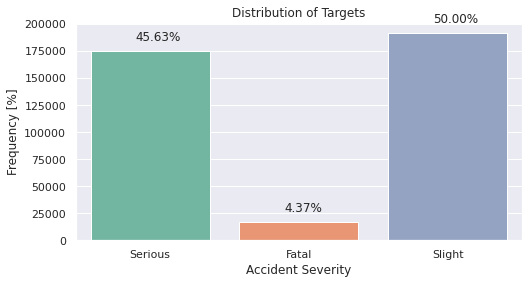

In [ ]:
# We can see the Serious and Fatal data were oversampled 
ax = sns.countplot(x = Model_df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(Model_df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [ ]:
# Recode some variables 
Model_df['Sex_of_Driver_Code'] = np.where(Model_df['Sex_of_Driver']=='Female',0,1)

Model_df['Accident_Severity_Flag'] = np.where(Model_df['Accident_Severity']=='Slight',0,1)

Model_df['InScotland_Code'] = np.where(Model_df['InScotland']=='Yes',1,0)
# Subset X data
X = Model_df[['Age_Band_of_Driver','Age_of_Vehicle','Engine_Capacity_.CC.',
                      'Sex_of_Driver_Code','Vehicle_Location.Restricted_Lane','Vehicle_Reference','1st_Road_Number',
                      '2nd_Road_Number','Vehicle_Location.Restricted_Lane','Vehicle_Reference','road_surface_conditions_code','road_type_code','day_of_week_code',
                      'weather_con_code',	'lig_con_code',	'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties',	'Number_of_Vehicles',	
         'Pedestrian_Crossing-Human_Control',	'Pedestrian_Crossing-Physical_Facilities','Speed_limit']]
# Recode the Age_Band_of_Driver variable
X = X.replace(to_replace ='0 - 5', 
                 value =1) 
X = X.replace(to_replace ='6 - 10', 
                 value =2) 
X = X.replace(to_replace ='11 - 15', 
                 value =3) 
X = X.replace(to_replace ='16 - 20', 
                 value =4) 
X = X.replace(to_replace ='21 - 25', 
                 value =5) 
X = X.replace(to_replace ='26 - 35', 
                 value =6) 
X = X.replace(to_replace ='36 - 45', 
                 value =7) 
X = X.replace(to_replace ='46 - 55', 
                 value =8) 
X = X.replace(to_replace ='56 - 65', 
                 value =9) 
X = X.replace(to_replace ='66 - 75', 
                 value =10) 
X = X.replace(to_replace ='Over 75', 
                 value =11) 
X = X.replace(to_replace ='Data missing or out of range', 
                 value =0) 

# Subset Y data
Y = Model_df['Accident_Severity_Flag']


X = X.dropna()
Y = Y.dropna()
print(X.shape)
print(Y.shape)

(383108, 21)
(383108,)


### b.Polynomials, interaction terms, or more “risk scores” developed by you.

In [ ]:
# Because our columns are most categorical, we did not do the ploynomials but added an interaction term
X['Age_of_Vehicle*Speed_limit'] = X['Age_of_Vehicle'] * X['Speed_limit']

### c. Data Standardization (min/max or z-score)

In [ ]:
# Data Standardization
from scipy.stats import zscore
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols
# apply zscore standardization
zData = X[numeric_cols].apply(zscore)
# check out summary stats
zData.describe()

# Since most category columns in our dataset are recoded to codes, it is meaningless to do data standization to these code columns.
# So we chose not to standardize our dataset.

,Age_Band_of_Driver,Age_of_Vehicle,Engine_Capacity_.CC.,Sex_of_Driver_Code,Vehicle_Location.Restricted_Lane,Vehicle_Location.Restricted_Lane,Vehicle_Reference,Vehicle_Reference,1st_Road_Number,2nd_Road_Number,Vehicle_Location.Restricted_Lane,Vehicle_Location.Restricted_Lane,Vehicle_Reference,Vehicle_Reference,road_surface_conditions_code,road_type_code,day_of_week_code,weather_con_code,lig_con_code,Did_Police_Officer_Attend_Scene_of_Accident,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Age_of_Vehicle*Speed_limit
count,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05,3.831080e+05
mean,2.760168e-14,-9.062418e-14,9.477287e-15,3.616286e-13,7.974665e-15,7.974665e-15,3.342489e-14,3.342489e-14,-4.567218e-15,-1.186365e-14,7.974665e-15,7.974665e-15,3.342489e-14,3.342489e-14,-9.951446e-15,-3.169665e-13,-2.432693e-15,-1.646304e-14,3.561755e-14,4.999912e-13,-6.878312e-14,8.575042e-15,1.631194e-14,3.019398e-15,9.674659e-14,-1.767211e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.689355e+00,-1.336480e+00,-1.715278e+00,-1.497104e+00,-1.132722e-01,-1.132722e-01,-6.063619e-01,-6.063619e-01,-5.656389e-01,-2.872500e-01,-1.132722e-01,-1.132722e-01,-6.063619e-01,-6.063619e-01,-5.731373e-01,-2.627804e+00,-1.590834e+00,-3.299187e-01,-5.925610e-01,-3.686231e-01,-4.196796e-01,-9.125469e-01,-6.139064e-02,-3.821427e-01,-1.399379e+00,-1.201958e+00
25%,-6.206927e-01,-9.013824e-01,-4.420548e-01,-1.497104e+00,-1.132722e-01,-1.132722e-01,-6.063619e-01,-6.063619e-01,-5.650821e-01,-2.872500e-01,-1.132722e-01,-1.132722e-01,-6.063619e-01,-6.063619e-01,-5.731373e-01,5.124519e-01,-1.078800e+00,-3.299187e-01,-5.925610e-01,-3.686231e-01,-4.196796e-01,-1.010524e-01,-6.139064e-02,-3.821427e-01,-7.248615e-01,-7.558834e-01
50%,2.067723e-01,-3.118758e-02,-7.384416e-02,6.679561e-01,-1.132722e-01,-1.132722e-01,-6.063619e-01,-6.063619e-01,-4.804616e-01,-2.872500e-01,-1.132722e-01,-1.132722e-01,-6.063619e-01,-6.063619e-01,-5.731373e-01,5.124519e-01,-5.473337e-02,-3.299187e-01,-5.925610e-01,-3.686231e-01,-4.196796e-01,-1.010524e-01,-6.139064e-02,-3.821427e-01,-7.248615e-01,-2.205937e-01
75%,6.205048e-01,6.214586e-01,3.357385e-01,6.679561e-01,-1.132722e-01,-1.132722e-01,5.154098e-01,5.154098e-01,-1.848463e-01,-2.872500e-01,-1.132722e-01,-1.132722e-01,5.154098e-01,5.154098e-01,1.091484e+00,5.124519e-01,9.693334e-01,-3.299187e-01,1.176818e+00,-3.686231e-01,3.141023e-01,-1.010524e-01,-6.139064e-02,-3.821427e-01,1.298691e+00,4.485184e-01
max,1.861702e+00,1.476212e+01,5.446581e+01,6.679561e-01,1.030109e+01,1.030109e+01,7.006526e+01,7.006526e+01,5.000947e+00,7.506036e+00,1.030109e+01,1.030109e+01,7.006526e+01,7.006526e+01,6.085346e+00,2.396606e+00,1.481367e+00,4.996664e+00,2.946197e+00,5.676730e+00,6.708825e+01,5.264609e+01,1.886758e+01,4.083033e+00,1.973209e+00,1.690868e+01


## Spot checking


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000000, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Per', Perceptron()))
models.append(('SGDC', SGDClassifier(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('ET', ExtraTreesClassifier(random_state=seed)))
models.append(('BC', BaggingClassifier(random_state=seed)))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.607152 (0.001863)
RF: 0.637002 (0.003207)


## Hyperparameter Tuning

In [ ]:
# Since our dataset is too huge to do the hyperparameter tuning, when we ran the GridSearchCV for the gradient boosting model, 
# it took us more than 5 hours but we still got nothing! So we decided to subset the data for only 2016. 
# The reason why we choose the data of one year for random selection is that we are afraid that the time series 
# will affect the data of each year randomly selected, which will affect the prediction results. 
# We picked 2016 because we think the most recent data is more valid than the previous data.

# Subset the data
df2016 = df0[df0['Year_x'] == 2016]

# To make sure we can run the results in a shorter time, we sampled our data with 3500 for each category - '0' and '1'
sub_data1 = df2016[(df2016['Accident_Severity'] == 'Serious') | (df2016['Accident_Severity'] == 'Fatal')]
sub_data1 = sub_data1.sample(n = 3500)
sub_data2 = df2016[df2016['Accident_Severity'] == 'Slight']
sub_data2 = sub_data2.sample(n = 3500)

# Merge two dataset
frames = [sub_data1, sub_data2]
Model_df = pd.concat(frames)

#recode columns
Model_df['Sex_of_Driver_Code'] = np.where(Model_df['Sex_of_Driver']=='Female',0,1)

Model_df['Accident_Severity_Flag'] = np.where(Model_df['Accident_Severity']=='Slight',0,1)

Model_df['InScotland_Code'] = np.where(Model_df['InScotland']=='Yes',1,0)

# selcect our variables
X = Model_df[['Age_Band_of_Driver','Age_of_Vehicle','Engine_Capacity_.CC.',
                      'Sex_of_Driver_Code','Vehicle_Location.Restricted_Lane','Vehicle_Reference','1st_Road_Number',
                      '2nd_Road_Number','Vehicle_Location.Restricted_Lane','Vehicle_Reference','road_surface_conditions_code','road_type_code','day_of_week_code',
                      'weather_con_code',	'lig_con_code',	'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties',	'Number_of_Vehicles',	
         'Pedestrian_Crossing-Human_Control',	'Pedestrian_Crossing-Physical_Facilities','Speed_limit']]
Y = Model_df['Accident_Severity_Flag']

# recode 'Age_Band_of_Driver' to make it more clear
X = X.replace(to_replace ='0 - 5', 
                 value =1) 
X = X.replace(to_replace ='6 - 10', 
                 value =2) 
X = X.replace(to_replace ='11 - 15', 
                 value =3) 
X = X.replace(to_replace ='16 - 20', 
                 value =4) 
X = X.replace(to_replace ='21 - 25', 
                 value =5) 
X = X.replace(to_replace ='26 - 35', 
                 value =6) 
X = X.replace(to_replace ='36 - 45', 
                 value =7) 
X = X.replace(to_replace ='46 - 55', 
                 value =8) 
X = X.replace(to_replace ='56 - 65', 
                 value =9) 
X = X.replace(to_replace ='66 - 75', 
                 value =10) 
X = X.replace(to_replace ='Over 75', 
                 value =11) 
X = X.replace(to_replace ='Data missing or out of range', 
                 value =0) 
X = X.dropna()
Y = Y.dropna()
print(X.shape)
print(Y.shape)

# Add an interaction term， 
# Since most category columns in our dataset are recoded to codes, it is meaningless to choose the 'code' column
X['Age_of_Vehicle*Speed_limit'] = X['Age_of_Vehicle'] * X['Speed_limit']
# apply zscore standardization
from scipy.stats import zscore
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols
zData = X[numeric_cols].apply(zscore)

#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  random_state=42)

(7000, 21)
(7000,)


In [ ]:
# According to the results for all our 11 models, we chose 6 of them with a score more than 0.6
# Construct some pipelines with the models
pipe_LR = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression())])

pipe_RF = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_GB = Pipeline([('scl', StandardScaler()),
			('clf', GradientBoostingClassifier(random_state=seed))])

pipe_LDA = Pipeline([('scl', StandardScaler()),
			('clf', LinearDiscriminantAnalysis())])

pipe_ET = Pipeline([('scl', StandardScaler()),
			('clf', ExtraTreesClassifier(random_state=seed))])

pipe_BC = Pipeline([('scl', StandardScaler()),
			('clf', BaggingClassifier(random_state=seed))])

In [ ]:
# Set grid search params
param_range = [1, 5, 10, 100]
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

grid_params_LR = [{'clf__tol': alpha_lasso}]

grid_params_RF = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': [10, 15, 20],
		'clf__min_samples_split': param_range[1:],
		'clf__bootstrap': [True, False]}]

grid_params_GB = [{'clf__min_samples_leaf': param_range,
		'clf__max_depth': [10, 15, 20],
		'clf__min_samples_split': param_range[1:]}]

grid_params_LDA = [{'clf__tol': alpha_lasso}]

grid_params_ET = [{'clf__max_depth': [10, 15, 20], 
		'clf__min_samples_leaf': param_range,
		'clf__n_estimators': [10,20,30],
		'clf__min_samples_split': param_range[1:],
		'clf__bootstrap': [True, False]}]

grid_params_BC = [{'clf__warm_start': [True, False],
    'clf__bootstrap': [True, False]}]

In [ ]:
# Construct grid searches
jobs = -1

gs_LR = GridSearchCV(estimator=pipe_LR,
			param_grid=grid_params_LR,
			scoring='accuracy',
			cv=10) 
			
gs_RF = GridSearchCV(estimator=pipe_RF,
			param_grid=grid_params_RF,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_GB = GridSearchCV(estimator=pipe_GB,
			param_grid=grid_params_GB,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_LDA = GridSearchCV(estimator=pipe_LDA,
			param_grid=grid_params_LDA,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_ET = GridSearchCV(estimator=pipe_ET,
			param_grid=grid_params_ET,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_BC = GridSearchCV(estimator=pipe_BC,
			param_grid=grid_params_BC,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)


In [ ]:
# List of pipelines for ease of iteration
grids = [gs_LR, gs_RF, gs_GB, gs_LDA, gs_ET, gs_BC]

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0: 'LogisticRegression', 1: 'RandomForestClassifier', 
		2: 'GradientBoostingClassifier', 3: 'LinearDiscriminantAnalysis', 
		4: 'ExtraTreesClassifier', 5: 'BaggingClassifier'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, Y_train.ravel())
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(Y_test, y_pred) > best_acc:
		best_acc = accuracy_score(Y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: LogisticRegression
Best params: {'clf__tol': 1}
Best training accuracy: 0.573
Test set accuracy score for best params: 0.585 

Estimator: RandomForestClassifier
Best params: {'clf__bootstrap': True, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 100}
Best training accuracy: 0.632
Test set accuracy score for best params: 0.608 

Estimator: GradientBoostingClassifier
Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 100}
Best training accuracy: 0.607
Test set accuracy score for best params: 0.609 

Estimator: LinearDiscriminantAnalysis
Best params: {'clf__tol': 1e-15}
Best training accuracy: 0.573
Test set accuracy score for best params: 0.586 

Estimator: ExtraTreesClassifier
Best params: {'clf__bootstrap': False, 'clf__max_depth': 20, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 100, 'clf__n_estimators': 30}
Best training accuracy: 0.619

In [ ]:
# Fit the models
# Logistic Regression
lr = LogisticRegression(tol=10)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_test, Y_test) * 100, 2)
print('Logistic Regression')
print(acc_lr)

# Random Forest
rf = RandomForestClassifier(bootstrap=True, 
                            criterion='gini', 
                            max_depth=15, 
                            min_samples_leaf=5,
                            min_samples_split=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_test, Y_test) * 100, 2)
acc_lr = round(lr.score(X_test, Y_test) * 100, 2)
print('Random Forest')
print(acc_rf)

# Gradient Boosting
gb = GradientBoostingClassifier(max_depth=15, 
                                min_samples_leaf=100,
                                min_samples_split=5)
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)
acc_gb = round(gb.score(X_train, Y_train) * 100, 2)
print('Gradient Boosting')
print(acc_gb)


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(tol=1e-15)
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)
acc_lda = round(lda.score(X_test, Y_test) * 100, 2)
print('Linear Discriminant Analysis')
print(acc_lda)

# Extra Trees
et = ExtraTreesClassifier(bootstrap=False,
                          max_depth=20,
                          min_samples_leaf=10,
                          min_samples_split=5,
                          n_estimators=10)
et.fit(X_train, Y_train)
Y_pred = et.predict(X_test)
acc_et = round(et.score(X_test, Y_test) * 100, 2)
print('Extra Trees')
print(acc_et)

# Bagging
bc = BaggingClassifier(bootstrap=True,
                       warm_start=True)
bc.fit(X_train, Y_train)
Y_pred = bc.predict(X_test)
acc_bc = round(bc.score(X_test, Y_test) * 100, 2)
print('Bagging')
print(acc_bc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression
56.95
Random Forest
61.52
Gradient Boosting
78.39
Linear Discriminant Analysis
58.62
Extra Trees
58.19
Bagging
56.29


In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.643


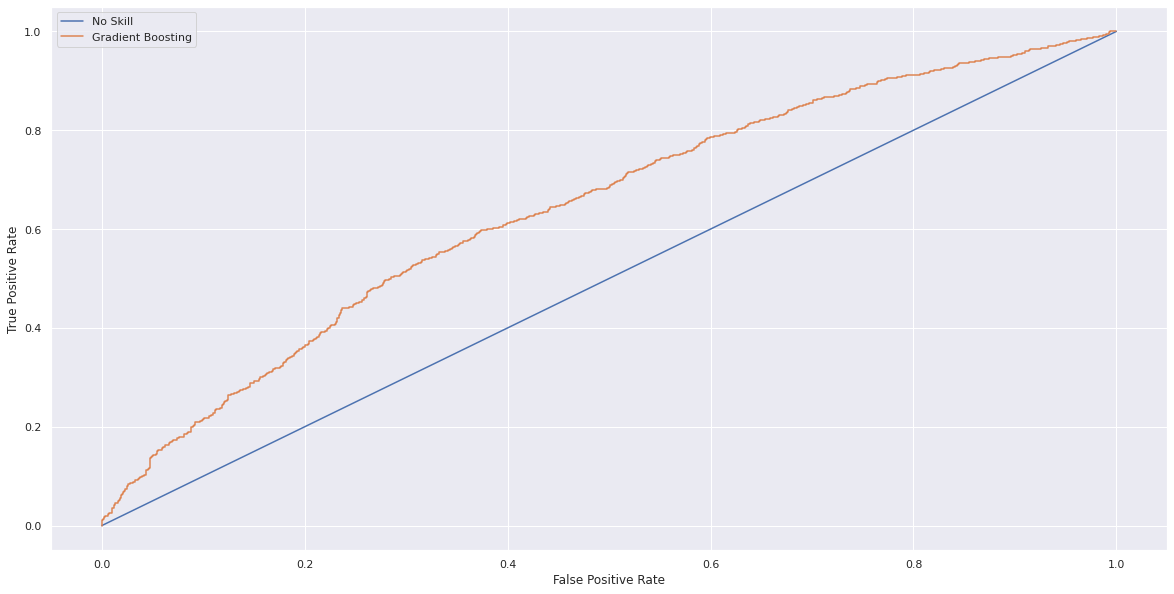

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
gb_probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
gb_auc = roc_auc_score(Y_test, gb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(Y_test, gb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='-', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Confusion matrix with the best model
from sklearn.metrics import classification_report, confusion_matrix
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,y_pred))
Y_test.value_counts()

Confusion matrix: 
 [[646 373]
 [452 629]]
Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      1019
           1       0.63      0.58      0.60      1081

    accuracy                           0.61      2100
   macro avg       0.61      0.61      0.61      2100
weighted avg       0.61      0.61      0.61      2100



1    1081
0    1019
Name: Accident_Severity_Flag, dtype: int64

## Permutation Test
Since we are not satisfied with our results, we're trying to use permutation test to select variables to get better results

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
#use RandomForestClassifer model to do the permuattion test 
# RFC is better for permutation test 
clf_models = []
clf_models.append(('RF', RandomForestClassifier()))
for name, model in clf_models:
  exec(f'clf_{name} = model.fit(X_train, Y_train)')
  msg = "Model: clf_%s , Score:%.2f" % (name, model.score(X_train, Y_train))
  print(msg)
  print(confusion_matrix(Y_test, model.predict(X_test)))
  print('')

Model: clf_RF , Score:1.00
[[668 351]
 [454 627]]



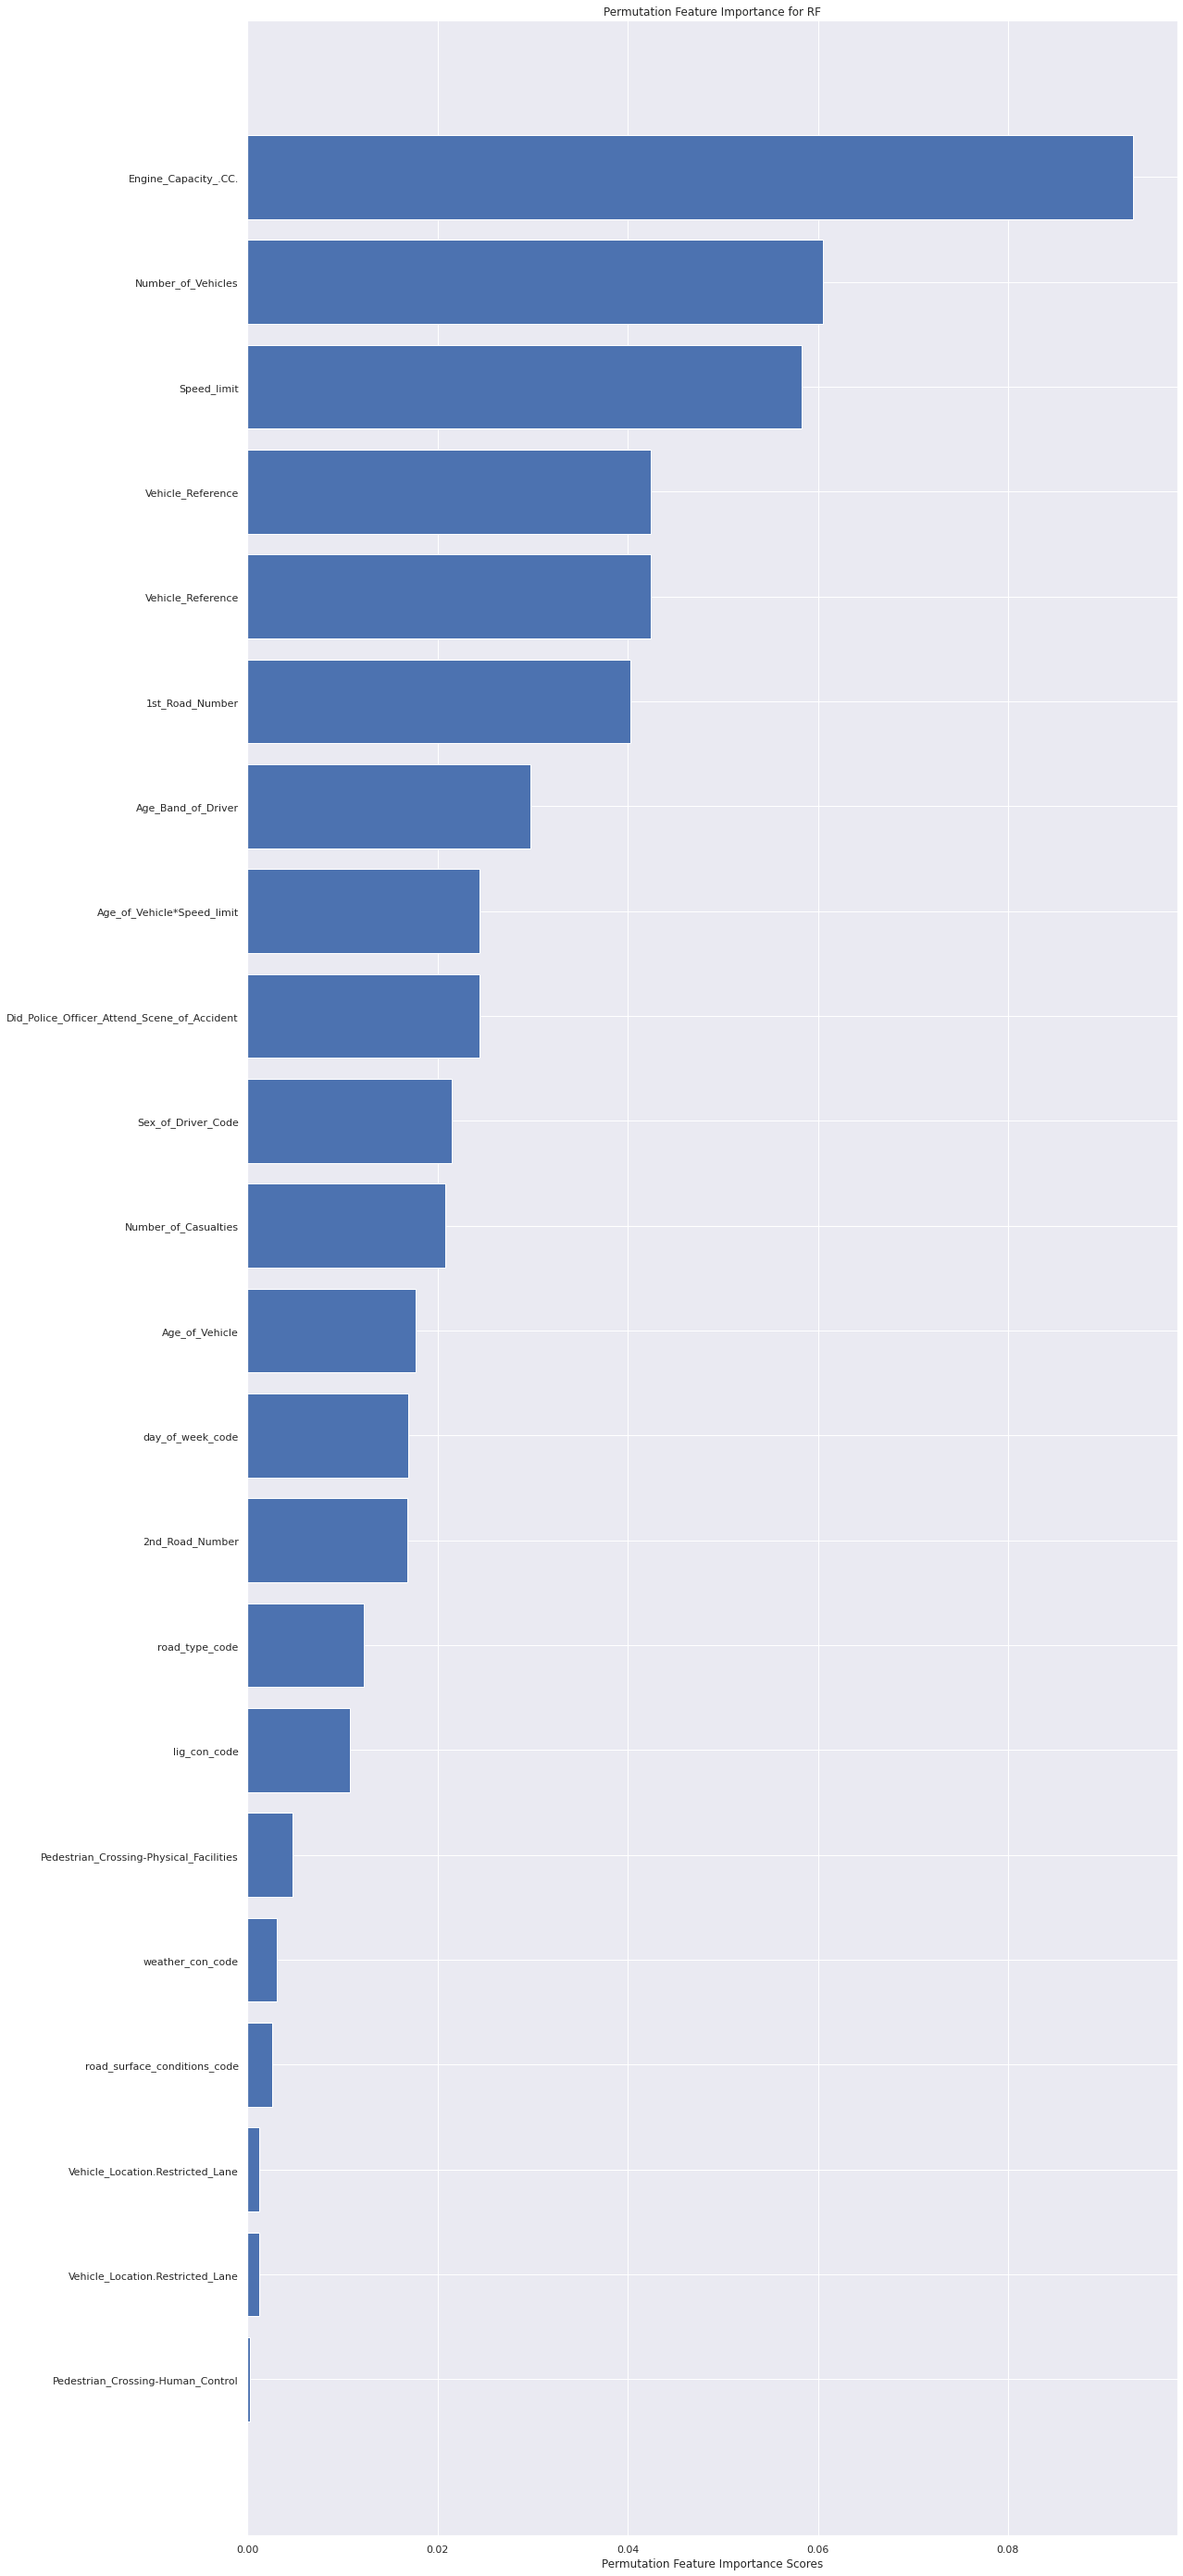

In [ ]:
for name, model in clf_models:
  # perform permutation importance
  results = permutation_importance(model, X, Y, scoring='accuracy')
  # get importance
  importance = results.importances_mean
  sorted_idx = np.argsort(importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplots(figsize=(18,50))
  plt.barh(pos, importance[sorted_idx], align='center')
  plt.yticks(pos, X.columns[sorted_idx])
  plt.xlabel('Permutation Feature Importance Scores')
  plt.title('Permutation Feature Importance for %s' % name)
  plt.show()

##  Run hyperparameter tuning again using important variables 

In [ ]:
# exlude the variables that contribute less to the model
# you can play with it!
a = list(X.columns[sorted_idx])
X = X[X.columns.intersection(a[7:])]

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  random_state=42)

# According to the results for all our 11 models, we chose 6 of them with a score more than 0.6
# Construct some pipelines with the models
pipe_LR = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression())])

pipe_RF = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_GB = Pipeline([('scl', StandardScaler()),
			('clf', GradientBoostingClassifier(random_state=seed))])

pipe_LDA = Pipeline([('scl', StandardScaler()),
			('clf', LinearDiscriminantAnalysis())])

pipe_ET = Pipeline([('scl', StandardScaler()),
			('clf', ExtraTreesClassifier(random_state=seed))])

pipe_BC = Pipeline([('scl', StandardScaler()),
			('clf', BaggingClassifier(random_state=seed))])

# Set grid search params
param_range = [1, 5, 10, 100]
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

grid_params_LR = [{'clf__tol': alpha_lasso}]

grid_params_RF = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': [10, 15, 20],
		'clf__min_samples_split': param_range[1:],
		'clf__bootstrap': [True, False]}]

grid_params_GB = [{'clf__min_samples_leaf': param_range,
		'clf__max_depth': [10, 15, 20],
		'clf__min_samples_split': param_range[1:]}]

grid_params_LDA = [{'clf__tol': alpha_lasso}]

grid_params_ET = [{'clf__max_depth': [10, 15, 20], 
		'clf__min_samples_leaf': param_range,
		'clf__n_estimators': [10,20,30],
		'clf__min_samples_split': param_range[1:],
		'clf__bootstrap': [True, False]}]

grid_params_BC = [{'clf__warm_start': [True, False],
    'clf__bootstrap': [True, False]}]

# Construct grid searches
jobs = -1

gs_LR = GridSearchCV(estimator=pipe_LR,
			param_grid=grid_params_LR,
			scoring='accuracy',
			cv=10) 
			
gs_RF = GridSearchCV(estimator=pipe_RF,
			param_grid=grid_params_RF,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_GB = GridSearchCV(estimator=pipe_GB,
			param_grid=grid_params_GB,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_LDA = GridSearchCV(estimator=pipe_LDA,
			param_grid=grid_params_LDA,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_ET = GridSearchCV(estimator=pipe_ET,
			param_grid=grid_params_ET,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_BC = GridSearchCV(estimator=pipe_BC,
			param_grid=grid_params_BC,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_LR, gs_RF, gs_GB, gs_LDA, gs_ET, gs_BC]

# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0: 'LogisticRegression', 1: 'RandomForestClassifier', 
		2: 'GradientBoostingClassifier', 3: 'LinearDiscriminantAnalysis', 
		4: 'ExtraTreesClassifier', 5: 'BaggingClassifier'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, Y_train.ravel())
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(Y_test, y_pred) > best_acc:
		best_acc = accuracy_score(Y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: LogisticRegression
Best params: {'clf__tol': 10}
Best training accuracy: 0.576
Test set accuracy score for best params: 0.598 

Estimator: RandomForestClassifier
Best params: {'clf__bootstrap': False, 'clf__criterion': 'entropy', 'clf__max_depth': 15, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 100}
Best training accuracy: 0.628
Test set accuracy score for best params: 0.611 

Estimator: GradientBoostingClassifier
Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 100, 'clf__min_samples_split': 5}
Best training accuracy: 0.607
Test set accuracy score for best params: 0.607 

Estimator: LinearDiscriminantAnalysis
Best params: {'clf__tol': 1e-15}
Best training accuracy: 0.573
Test set accuracy score for best params: 0.596 

Estimator: ExtraTreesClassifier
Best params: {'clf__bootstrap': False, 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 100, 'clf__n_estimators': 30}
Best training accuracy: 

In [ ]:
# Fit the models
# Logistic Regression
lr = LogisticRegression(tol=10)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_test, Y_test) * 100, 2)
print('Logistic Regression_1')
print(acc_lr)

# Random Forest
rf = RandomForestClassifier(bootstrap=False, 
                            criterion='gini', 
                            max_depth=15, 
                            min_samples_leaf=1,
                            min_samples_split=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_test, Y_test) * 100, 2)
acc_lr = round(lr.score(X_test, Y_test) * 100, 2)
print('Random Forest_1')
print(acc_rf)

# Gradient Boosting
gb = GradientBoostingClassifier(max_depth=10, 
                                min_samples_leaf=10,
                                min_samples_split=100)
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)
acc_gb = round(gb.score(X_train, Y_train) * 100, 2)
print('Gradient Boosting_1')
print(acc_gb)


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(tol=1e-15)
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)
acc_lda = round(lda.score(X_test, Y_test) * 100, 2)
print('Linear Discriminant Analysis_1')
print(acc_lda)

# Extra Trees
et = ExtraTreesClassifier(bootstrap=False,
                          max_depth=20,
                          min_samples_leaf=1,
                          min_samples_split=100,
                          n_estimators=20)
et.fit(X_train, Y_train)
Y_pred = et.predict(X_test)
acc_et = round(et.score(X_test, Y_test) * 100, 2)
print('Extra Trees_1')
print(acc_et)

# Bagging
bc = BaggingClassifier(bootstrap=True,
                       warm_start=True)
bc.fit(X_train, Y_train)
Y_pred = bc.predict(X_test)
acc_bc = round(bc.score(X_test, Y_test) * 100, 2)
print('Bagging_1')
print(acc_bc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression_1
56.33
Random Forest_1
60.52
Gradient Boosting_1
86.71
Linear Discriminant Analysis_1
55.76
Extra Trees_1
58.62
Bagging_1
55.67


No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.644


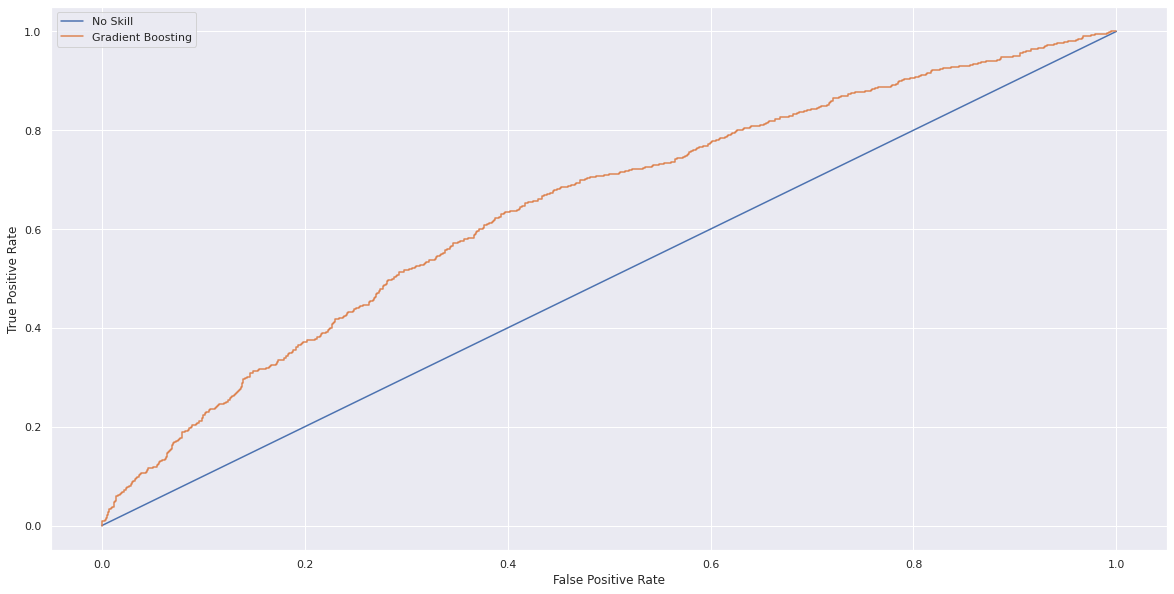

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
gb_probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
gb_auc = roc_auc_score(Y_test, gb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(Y_test, gb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='-', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Confusion matrix with the best model
from sklearn.metrics import classification_report, confusion_matrix
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,y_pred))
Y_test.value_counts()

Confusion matrix: 
 [[654 365]
 [453 628]]
Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.64      0.62      1019
           1       0.63      0.58      0.61      1081

    accuracy                           0.61      2100
   macro avg       0.61      0.61      0.61      2100
weighted avg       0.61      0.61      0.61      2100



1    1081
0    1019
Name: Accident_Severity_Flag, dtype: int64

## 3. Save Our Model and Model Results

In [ ]:
print("Gradient Boosting scores")
model_results = pd.DataFrame({
    'Model': ['Gradient Boosting_1'], 
    'Score': [acc_gb]})
model_results.sort_values(by='Score', ascending=False)

Gradient Boosting scores


,Model,Score
0,Gradient Boosting_1,86.71
